In [3]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#read file form GoogleDrive
df = pd.read_csv('/content/drive/MyDrive/Text Mining SI 20C/BBC news dataset.csv')

#df = pd.read_csv('new_clean_file_after_text_preprocessing.csv')
#df['processed'].head() #first 5 rows in column 'title'
#df #all rows

In [5]:
#print existing column on file
print(list(df))

['Unnamed: 0', 'description', 'tags']


In [10]:
#split text
text = df['description' ]
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases

# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [12]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<13457 unique tokens: ['a_statement', 'act', 'action', 'adrian', 'although']...>


In [13]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[98])

#build TF-IDF model
tfidf = models.TfidfModel(doc_term_matrix) 
corpus_tfidf = tfidf[doc_term_matrix]

2410
[(47, 1), (50, 1), (65, 1), (177, 1), (185, 2), (219, 3), (300, 1), (322, 1), (343, 1), (364, 4), (369, 2), (370, 1), (376, 1), (398, 2), (401, 1), (420, 1), (425, 1), (456, 1), (473, 3), (502, 1), (566, 1), (748, 1), (810, 1), (887, 1), (902, 1), (925, 1), (976, 1), (1071, 1), (1080, 1), (1105, 1), (1206, 1), (1700, 1), (1725, 1), (1879, 2), (1912, 1), (1980, 3), (2081, 1), (2127, 1), (2206, 1), (2285, 1), (2474, 1), (2627, 1), (2899, 1), (2907, 2), (3119, 1), (3523, 3), (3525, 3), (3533, 1), (3794, 1), (3795, 1), (4082, 6), (4209, 3), (4297, 1), (4487, 1), (4488, 1), (4489, 3), (4490, 1), (4491, 1), (4492, 1), (4493, 1), (4494, 1), (4495, 3), (4496, 1), (4497, 1), (4498, 1)]


In [14]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

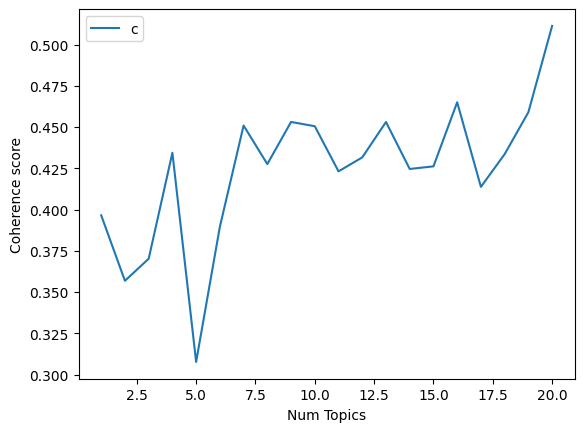

In [15]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
!pip install "pandas<2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3965
Num Topics = 2  has Coherence Value of 0.3568
Num Topics = 3  has Coherence Value of 0.3702
Num Topics = 4  has Coherence Value of 0.4344
Num Topics = 5  has Coherence Value of 0.3076
Num Topics = 6  has Coherence Value of 0.3896
Num Topics = 7  has Coherence Value of 0.4509
Num Topics = 8  has Coherence Value of 0.4276
Num Topics = 9  has Coherence Value of 0.4531
Num Topics = 10  has Coherence Value of 0.4505
Num Topics = 11  has Coherence Value of 0.4232
Num Topics = 12  has Coherence Value of 0.4316
Num Topics = 13  has Coherence Value of 0.4531
Num Topics = 14  has Coherence Value of 0.4246
Num Topics = 15  has Coherence Value of 0.4262
Num Topics = 16  has Coherence Value of 0.465
Num Topics = 17  has Coherence Value of 0.4138
Num Topics = 18  has Coherence Value of 0.4336
Num Topics = 19  has Coherence Value of 0.459
Num Topics = 20  has Coherence Value of 0.5113


In [18]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=2) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"m_m" + 0.002*"film" + 0.001*"box_office" + 0.001*"had_been" + 0.001*"bn" + 0.001*"last_year" + 0.001*"music" + 0.001*"best" + 0.001*"according_to" + 0.001*"festival"
Topic: 1 Word: 0.001*"number_one" + 0.001*"last_year" + 0.001*"deutsche_boerse" + 0.001*"stock_market" + 0.001*"sales" + 0.001*"bn" + 0.001*"chief_executive" + 0.001*"singles_chart" + 0.001*"according_to" + 0.001*"album"


In [19]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 50)])
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2_50_clean.csv")
print(df)


None


In [22]:
pip install --upgrade pip setuptools


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [23]:
#ini dilakukan jika module belum tersedia
!pip install pyLDAvis
#!apt-get -qq install -y pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
pip install pandas --upgrade


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install pyLDAvis 
!pip install "pandas<2.0.0"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [39]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim_clean.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.010851  0.0       1        1  61.943107
1     -0.010851  0.0       2        1  38.056893, topic_info=                  Term       Freq      Total Category  logprob  loglift
13082  deutsche_boerse   8.000000   8.000000  Default  30.0000  30.0000
11173       box_office  21.000000  21.000000  Default  29.0000  29.0000
13071     stock_market  10.000000  10.000000  Default  28.0000  28.0000
12873    singles_chart   8.000000   8.000000  Default  27.0000  27.0000
13404            marsh   4.000000   4.000000  Default  26.0000  26.0000
...                ...        ...        ...      ...      ...      ...
747           he_added   4.350562  13.117519   Topic2  -7.5655  -0.1376
1791            awards   4.363243  13.429007   Topic2  -7.5626  -0.1581
3527          new_york   4.324856  14.595357   Topic2  -7.5714  -0.2502
818               film   4.365896  30.874